準備

In [ ]:
!sudo pip install -U RISE

Jupyterをリスタートする。コンテナの場合は、コンテナをリスタートする。

In [ ]:
!sudo apt-get update
!sudo apt-get install -y graphviz libgraphviz-dev
!pip install -U pygraphviz networkx

<span style="font-size: 180%;">オープンサイエンスを愛し、</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/Sunshine_ikezaki.png" width=700>

<span style="font-size: 180%;">オープンサイエンスに愛された男</span>

<span style="font-size: 50%;">出典：ウィキメディア・コモンズ https://commons.wikimedia.org/wiki/File:Sunshine_ikezaki.png</span>

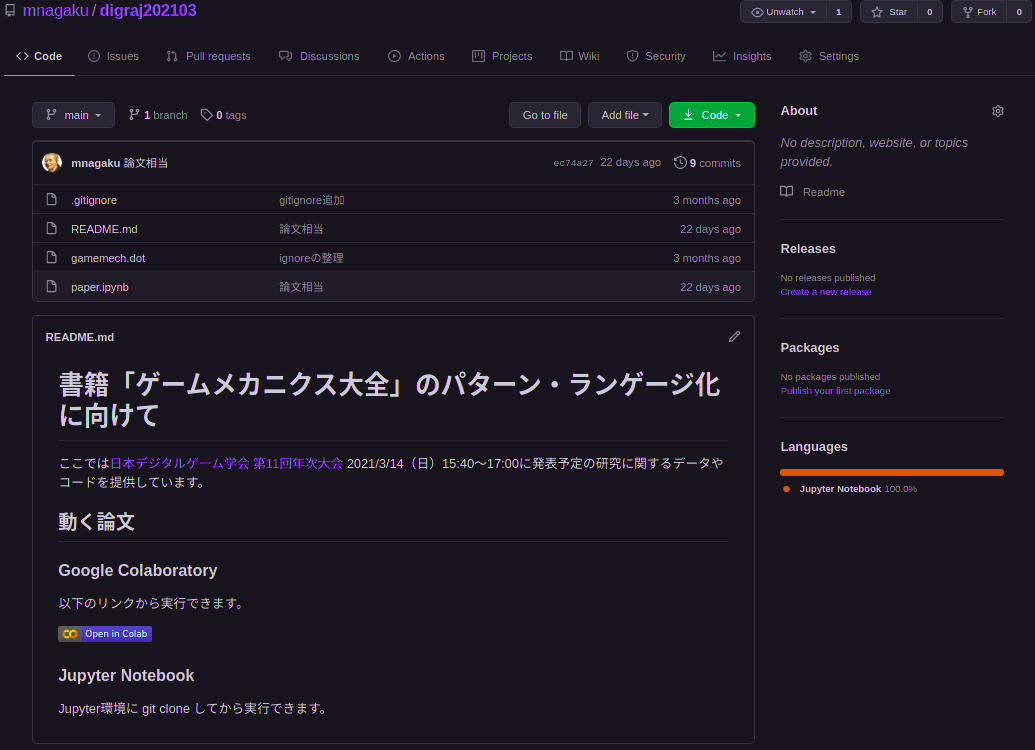

<span style="font-size: 140%;">Web、クラウド、HPC、全てのインフラの生みの親</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/Sunshine_ikezaki.png" width=700>

<span style="font-size: 140%;">人呼んで、七福神八人目のLC4RIの神</span>

<span style="font-size: 50%;">出典：ウィキメディア・コモンズ https://commons.wikimedia.org/wiki/File:Sunshine_ikezaki.png</span>

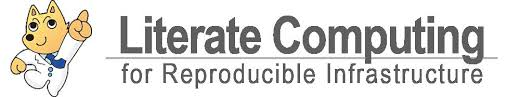

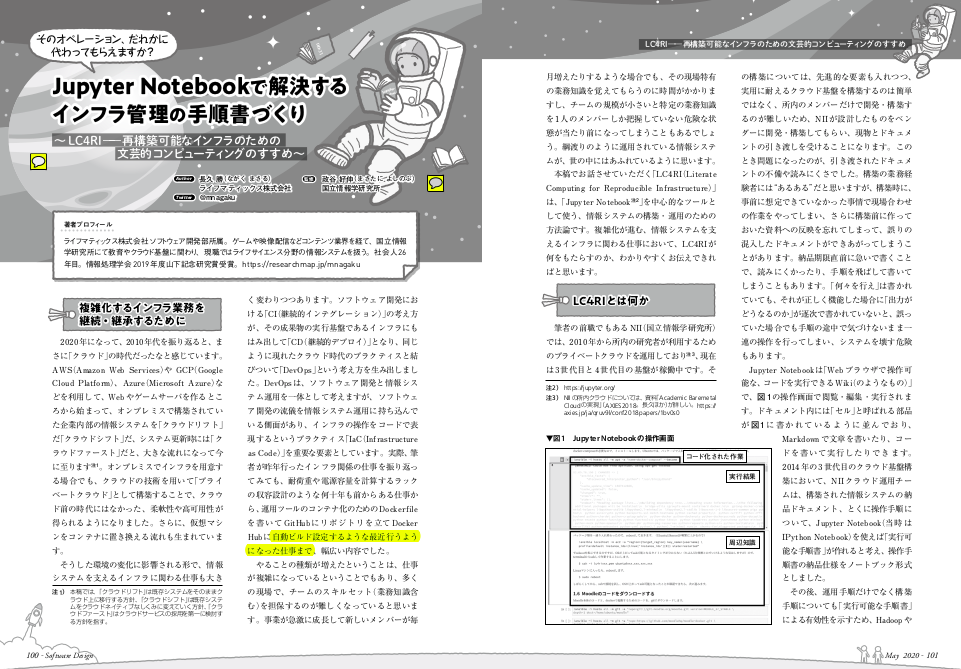

<span style="font-size: 150%;">書籍「ゲームメカニクス大全」の</span>

<span style="font-size: 150%;">パターン・ランゲージ化に向けて</span>

長久勝（[ライフマティックス株式会社](https://lifematics.co.jp/)）　  
小野憲史（[東京国際工科専門職大学](https://www.iput.ac.jp/tokyo)）　  
滝川陽一  
德岡正肇（[アトリエサード](http://www.a-third.com/top.html)）　  
長久佑  

<span style="font-size: 150%;">概要</span>

「ゲームメカニクス大全」をパターンの視点から見ると「もうちょっと頑張れるやろ」と思ったので、イイ感じにする方法について考えてみた。

<span style="font-size: 150%;">この発表に出てくる概念</span>

- ゲームデザイン：「ゲームデザイン」を「パターン」のフレームワークで形式的に扱う議論が中心なので、あんまり知らなくてもOK
- パターン：この発表で中心的な概念
- ネットワーク分析：「パターン」のフレームワーク上で形式論的な分析をするのに今回使った道具

<span style="font-size: 150%;">書籍「ゲームメカニクス大全」</span>

<img src="https://www.seshop.com/original/images/product/24080/L.png" width=100>

- 「Building Blocks of Tabletop Game Design」の邦訳
- アナログゲームにおけるデザインパターンを13カテゴリ184パターン収録
- 図書館に行ったら新刊コーナーに置いてて、軽い気持ちで借りた
- ゲームデザイン×パターン×謎の使命感

<span style="font-size: 150%;">謎の使命感</span>

<img src="https://www.sbcr.jp/wp-content/uploads/product/4797311126-428x596.jpg" width=100>

- 「ジェフにデザインコンセプトをどのように分解して再構築できるかを示した」
- 監訳：本位田真一（ボス）、吉田和樹（上司）
- 「だったら、もうちょっとやれんぜ」という、謎の使命感
- 「ぼくのかんがえたさいきょう」を減らすために英霊を召喚

<span style="font-size: 150%;">パターンの例</span>

パターンについて簡単に説明しとく。

<img src="https://learningpatterns.sfc.keio.ac.jp/image/PatternForm1.jpg" width=800>

<span style="font-size: 50%;">出典：ラーニング・パターンの読み方 https://learningpatterns.sfc.keio.ac.jp/howto.html</span>

<img src="https://learningpatterns.sfc.keio.ac.jp/image/PatternForm2.jpg" width=800>

今日のところは、他のパターンへの参照を持ってる、というのを理解できればOK。

<span style="font-size: 50%;">出典：ラーニング・パターンの読み方 https://learningpatterns.sfc.keio.ac.jp/howto.html</span>

<span style="font-size: 150%;">「ゲームメカニクス大全」への不満：</span>

<span style="font-size: 150%;">片方向参照が多い</span>

パターンA→パターンB

（AのページにBについて言及がある。BのページにAについての言及がない）

- パターンAは、参照「A→B」から関連のあるパターンBの存在を認識できる
- パターンBは、参照がないため、関連のあるパターンAの存在を認識できない

不便の例：「AとBを同時に使うと効果的なのに、先にBの採用から入ると、Aの存在に気付けない」

<span style="font-size: 150%;">解決：双方向な参照情報の完備</span>

まずは、書籍から参照情報を抜き出してデータ化する。

In [ ]:
!cat gamemech.dot

データをPythonで読み込んで加工する準備を行う。

In [ ]:
from pygraphviz import *
g = AGraph("gamemech.dot")

nodes = g.nodes()
edges = g.edges()

隣接行列を対角線で折り返し上三角行列化することで、参照情報を無方向グラフ化し、双方向な参照情報とする（正規化）。
ついでに元々参照が双方向だったものも数え上げておく。

In [ ]:
c = 0
pair = ''
for edge in edges:
    if nodes.index(edge[0]) > nodes.index(edge[1]):
        g.delete_edge(edge[0], edge[1])
        if not (edge[1], edge[0]) in edges:
            g.add_edge(edge[1], edge[0])
        else:
            c += 1
            pair += "("+edge[1]+","+edge[0]+"), " # 参照が双方向のものを抽出

In [ ]:
print("正規化前のデータで相互参照されていたパターンの組み合わせ")
print(pair)
print(str(c)+"組")

g.write("gamemech2.dot")
gamemech2_edges_count = !cat gamemech2.dot | grep "\-\-" | wc -l
print("正規化後のエッジ数 : "+gamemech2_edges_count[0]+"本")

正規化された参照情報。

In [ ]:
!cat gamemech2.dot

<span style="font-size: 150%;">「ゲームメカニクス大全」への不満：</span>

<span style="font-size: 150%;">パターンマップがない</span>

パターンマップの例

<img src="https://learningpatterns.sfc.keio.ac.jp/image/LPOverview640.jpg" width=600>

<span style="font-size: 50%;">出典：ラーニング・パターンの全体像 https://learningpatterns.sfc.keio.ac.jp/pattern_overview.html</span>

さきほど作ったデータを元に視覚化する。

In [ ]:
!dot -Tpng gamemech2.dot -ogamemech2.png
from IPython.display import Image, display_png
display_png(Image("gamemech2.png", width=800))

<span style="font-size: 150%;">解決しなかった</span>

パターンが多いと、単純にバネモデルの描画ではどうしようもないので、[マニュエル・リマ](https://www.amazon.co.jp/s?i=stripbooks&rh=p_27%3A%E3%83%9E%E3%83%8B%E3%83%A5%E3%82%A8%E3%83%AB%E3%83%BB%E3%83%AA%E3%83%9E%28Manuel+Lima%29&s=relevancerank&text=%E3%83%9E%E3%83%8B%E3%83%A5%E3%82%A8%E3%83%AB%E3%83%BB%E3%83%AA%E3%83%9E)を読み直すしかない。

<span style="font-size: 150%;">寄り道：カテゴリの中心性の確認</span>

次にパターンの関係について踏み込みたいが、パターンが多すぎるので、特定のカテゴリに限定して、その中での親子関係について考えてみたい。時間もないし、やることを絞り込みたいので。さて、どのカテゴリをやるべきか。長久は何となく「ゲームの構造」でいいかなあと思ってたら、英霊たちがそうじゃない「ゲーム終了と勝利」とか「解決」とか「アクション」とか「エコノミー」とかやろと言い出したので、中心性を確認してみようと考えた。

イイ感じに計算してみる。詳しくは予稿とコードを読んでください。

In [ ]:
import math

chapters = {}
for node in g.nodes():
    if node[0:3] in chapters:
        chapters[node[0:3]] += 1
    else:
        chapters[node[0:3]] = 1

chapter_edges = {}
for n1 in range(0,len(chapters)-1):
    n1str = list(chapters)[n1]
    for n2 in range(n1+1,len(chapters)):
        n2str = list(chapters)[n2]
        if not n1str in chapter_edges:
            chapter_edges[n1str] = {}
        chapter_edges[n1str].update({n2str:0})

for edge in g.edges():
    if edge[0][0:3] != edge[1][0:3]:
        chapter_edges[edge[0][0:3]][edge[1][0:3]] += 1

chapg1 = AGraph(chapter_edges, splines=True, layout='neato', overlap=False)
chapg2 = AGraph(chapter_edges, splines=True, layout='neato', overlap=False)
chapg3 = AGraph(chapter_edges, splines=True, layout='neato', overlap=False)

for n1 in range(0,len(chapters)-1):
    n1str = list(chapters)[n1]
    n1color = [((int(n1/6)+2)%3)*((int(n1/6)+2)%3+1)*51/2+25, (int(n1/2)%3)*(int(n1/2)%3+1)*51/2+25, (n1%2)*128+64]
    for n2 in range(n1+1,len(chapters)):
        n2str = list(chapters)[n2]
        n2color = [((int(n2/6)+2)%3)*((int(n2/6)+2)%3+1)*51/2+25, (int(n2/2)%3)*(int(n2/2)%3+1)*51/2+25, (n2%2)*128+64]
        if chapter_edges[n1str][n2str] == 0:
            chapg1.delete_edge(n1str,n2str)
            chapg2.delete_edge(n1str,n2str)
            chapg3.delete_edge(n1str,n2str)
        else:
            w1 = chapter_edges[n1str][n2str]
            w2 = w1/(chapters[n1str]*chapters[n2str])
            chapg1.get_edge(n1str,n2str).attr['weight'] = w1
            chapg2.get_edge(n1str,n2str).attr['weight'] = w2
            penwidth = math.sqrt(w2)*50
            chapg1.get_edge(n1str,n2str).attr['penwidth'] = penwidth
            chapg2.get_edge(n1str,n2str).attr['penwidth'] = penwidth
            chapg3.get_edge(n1str,n2str).attr['penwidth'] = penwidth
            color = "#"+format(int((n1color[0]+n2color[0])/2), 'x')\
                +format(int((n1color[1]+n2color[1])/2), 'x')+format(int((n1color[2]+n2color[2])/2), 'x')\
                +format(int(255-w2*2500), 'x')
            chapg1.get_edge(n1str,n2str).attr['color'] = color
            chapg2.get_edge(n1str,n2str).attr['color'] = color
            chapg3.get_edge(n1str,n2str).attr['color'] = color

chapg1.write("chapg1.dot")
chapg2.write("chapg2.dot")
chapg3.write("chapg3.dot")

In [ ]:
import networkx as nx
from pprint import pprint

ng = nx.Graph(chapg3)

pr = nx.pagerank_numpy(ng)
pr_sorted = sorted(pr.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在有無で作ったカテゴリNWのPageRank")
pprint(pr_sorted)

In [ ]:
h,a = nx.hits_numpy(ng)
ht_sorted = sorted(h.items(), key=lambda x:x[1], reverse=True)
print("エッジ存在有無で作ったカテゴリNWのHITS")
pprint(ht_sorted)

エッジ存在有無で作ったカテゴリNWの視覚化（線の太さでパターン間の存在割合エッジ数を表現）

In [ ]:
!dot -Tpng chapg3.dot -ochapg3.png
from IPython.display import Image, display_png
display_png(Image("chapg3.png", width=300))

繋がっていることより、どこが繋がっていないかの方が、意味を持ってるような雰囲気ある。グラフ理論でその辺、何かあるかな。

よし「ゲーム終了と勝利（VIC）」について見てみよう。寄り道、終わり。

<span style="font-size: 150%;">「ゲームメカニクス大全」への不満：</span>

<span style="font-size: 150%;">パターンの関係についてもっと情報が欲しい</span>

例えば「親子関係」。同じカテゴリのパターンに、汎化関係を見つけることができるのではないか。また、親の持つ他のパターンとの関係が、子においても成立するか確認すれば、パターンの参照関係を増やすことができる。パターンの参照関係を増やせれば、より実用性が向上すると期待できる。

　まず、VIC内のパターンを読んで表のようにタイプ分類を行った。

| タイプ               | パターン                                        | 
| -------------------- | ----------------------------------------------- | 
| 勝利点増減           | vic01, vic02, vic03, vic04, vic06, vic17, vic20 | 
| かけひき             | vic05, vic18                                    | 
| 勝利条件＋終了条件   | vic07, vic08                                    | 
| 終了条件             | vic09, vic10, vic11, vic12, vic13, vic14, vic15 | 
| 勝利条件             | vic16                                           | 
| 勝利点増減＋終了条件 | vic19                                           | 

親子関係は同じタイプのパターン間にしか現れないと仮定して、VICのパターン間に付けられた参照について検討していく。

In [ ]:
label = ""
c = 0
f = False
pair = ""
for edge in g.edges():
    if label != edge[0][0:3]:
        if c > 0 and label == "vic":
            print(pair)
            print(str(c)+"組")
            f = False
        label = edge[0][0:3]
        if label == "vic":
            f = True
        c = 0
    if edge[0].startswith(edge[1][0:3]):
        if f:
            pair += str(edge) + ", "
        c += 1

　得られた16対の参照について検討していく（全ての組み合わせについてまでは今回は検討しない）。但し、「勝利条件＋終了条件」のような複合タイプについては、元となる単純タイプを親に持つことを認めるとする。タイプの違いにより親子関係となり得ないのは、('vic01', 'vic07')、('vic01', 'vic12')、('vic02', 'vic11')、('vic04', 'vic18')、('vic05', 'vic06')、('vic05', 'vic09')、('vic05', 'vic15')、('vic06', 'vic11')、('vic14', 'vic16')、('vic17', 'vic18')、の10組となる。

　残る6組を検討していく。

- ('vic01', 'vic02')：2つの異なる得点方法なので、親子関係ではない。
- ('vic07', 'vic11')：vic11の具体化の1つがvic07と見なせ、親子関係と言える。但し、複合タイプ化される。
- ('vic07', 'vic14')：vic07のレースの表現としてvic14が使われることがある（必ずではない）。レース以外の表現にも使われるため、親子関係ではない。

- ('vic10', 'vic11')：リソースの枯渇を目標として進行する場合もあるが、目標は別でリソースの枯渇でサドンデスの場合もあるので、親子関係ではない。
- ('vic11', 'vic19')：vic19は誰かが勝利に近づくと他のプレイヤは勝利から遠ざかる。vic11は全員が勝利に近づいていく。相反するメカニクスで、親子関係ではない。
- ('vic15', 'vic19')：vic19がvic15として使われる例が挙げられているが、vic19がメインで使われvic15ではない場合も考えられるため、親子関係ではない。

　以上の検討により、VIC内から親子関係('vic11'◁-'vic07')を特定した。
 

親子関係('vic11'◁-'vic07')ゲットだぜ！

　得られた親子関係('vic11'◁-'vic07')について、親の持つ参照を子が継承できているか確認する。

　vic11が持つ参照は6、内の1つは親子関係であるため、確認すべき参照は5となる。以下、順にその関係を確認し、vic11をvic07に置き換えても成立するか検討する。

- ('res10', 'vic11')：スタッキングとvic11を結び付けて言及されている。スタッキングは、vic07の「目標が直感的であり、誰がリードしているかが常に明らかである」と整合を付けやすく、置き換えは成立する。

- ('vic02', 'vic11')：vic02を勝利点獲得、vic11を終了条件とした組み合わせが紹介されている。vic07の「一定の勝利点への到達を目指すゲームは、本質的にレースゲームである」はvic02と整合を付けられるので、置き換えは成立する。
- ('vic06', 'vic11')：vic11単体ではプレイヤに終了を動機付けられないため、vic06で動機付けると述べている。vic07では先頭でゴールすることで勝利が確定するため、vic06がなくとも終了は動機付けられる。また、vic06の効果でvic07が確定させる勝利が影響を受けることもない。置き換えは成立しない。

- ('vic10', 'vic11')：vic10とvic11はゴールに近付いていくという形式上は違いがなく、ポジティブな意味付けかネガティブな意味付けかが違う。vic07もゴールに近付いていくという形式は同じであり、置き換えは成立する。
- ('vic11', 'vic19')：vic11とvic19の違いについて、vic11を「全員が同時に勝利に近付いていく」と述べている。これはvic07にも当てはまるため、置き換えは成立する。

　以上の検討により、参照5つのうち4つについて、参照の継承に問題ないことが分かった。

解決：パターンの関係をもっと増やす方法がある

考察

　パターンマップについては、静的な1枚絵で表現できるパターン数を超えていると考えられるため、[「Locomotion Vault」](https://locomotionvault.github.io/)のようにインタラクティブなコンテンツとして表現することを検討できる。

　カテゴリの中心性については、本研究の主題からは外れるが、指標や視覚化で整合した結果を得られており、カテゴリの関係性を把握するのに役立った。

　親子関係の精査の過程においては、vic01とvic07について、「レースのように見えて実際にはそうではない」ものが「vic01に相当」とされ、同時に実装できない関係が見つかった。「このパターンとあのパターンは同時に使うことができない」が実際に確認できた。

　参照の継承の確認では、タイプが完全に同じではない親子関係であったため、勝利条件についての親子の立場の違いから、継承できないものがあった。

　「勝利点増減」タイプのパターンは暗黙的に勝利点による勝利条件を仮定しているため、本来は、「勝利点による勝利判定」パターンが親として存在するのではないかと考えられた。

さいごに

　一連の作業により、本書の内容を補強する方向性を示せたものと考える。他のカテゴリにも作業を広げる、カテゴリ内の親子関係洗い出しを全組み合わせで行う、親子関係以外の関係についても検討する、といった作業を行い、インタラクティブなコンテンツとして全体像を表現することで、本書のパターン・ランゲージ化が実現されるであろう。

　本研究では、本書内容を所与のものとして、その妥当性を検証することは行っていないが、VIC内のタイプ分類で抽出した「かけひき」がVIC内に配置されることが妥当かには疑問がある。また、参照の意味についても、メカニクスに由来する参照と、タイトル採用実績に由来する参照が混在しているため、分けて記述した上で、メカニクスに由来する参照の網羅性を向上させる必要を感じた。こうした方向でも、取り組みはあり得るだろう。

　メカニクスに由来する参照を考慮すると、パターン間には排他や包含が存在すると考えられるため、ジマーマンが序文で述べた「ランダムに2つのページを開いてもらい、両方のメカニクスを組み合わせたゲームを作成」のアイデアは機能しない場合があるだろう。その場合に、なぜ機能しないのか考察することの教育的な効果は期待できるであろうが。

　本研究で実施したデータ分析については、

https://github.com/mnagaku/digraj202103

にてデータやコードを公開するので、追試研究や派生研究に取り組んでもらえれば幸いである。